In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('card transactions.csv')

In [3]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop the columns with all null values
df = df.dropna(how = 'all',axis = 1)

In [5]:
#covert date to datetime valuee
df['Date'] = pd.to_datetime(df['Date'])
categoricals = ['Merch zip','Recnum','Cardnum','Merchnum','Merch description','Merch state','Transtype','Fraud']

#convert categoricals columns to string datatype
for i in categoricals:
    df[i] = df[i].astype('string')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  string        
 1   Cardnum            96753 non-null  string        
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  string        
 4   Merch description  96753 non-null  string        
 5   Merch state        95558 non-null  string        
 6   Merch zip          92097 non-null  string        
 7   Transtype          96753 non-null  string        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  string        
dtypes: datetime64[ns](1), float64(1), string(8)
memory usage: 7.4 MB


In [7]:

df.describe(include = 'all')


/var/folders/6n/lpqyjnqd2_5cxx2_782jbcfr0000gn/T/ipykernel_92190/557198269.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753,96753,96753,93378,96753,95558,92097,96753,9.675300e+04,96753
unique,96753,1645,365,13091,13126,227,4567,4,NaN,2
top,1,5142148452,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,38118.0,P,NaN,0
freq,1,1192,684,9310,1688,12035,11868,96398,NaN,95694
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.278857e+02,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000614e+04,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.348000e+01,NaN


In [8]:
df.shape

(96753, 10)

In [9]:
#percentage of zero for numerical columns
numeric = ['Date','Amount']
zeros = (df[numeric] == 0).sum()/len(df[numeric])
zeros

Date      0.0
Amount    0.0
dtype: float64

In [10]:
#of populated 
populated = round(df.notna().mean(),3)
populated

Recnum               1.000
Cardnum              1.000
Date                 1.000
Merchnum             0.965
Merch description    1.000
Merch state          0.988
Merch zip            0.952
Transtype            1.000
Amount               1.000
Fraud                1.000
dtype: float64

In [11]:
#blank and zeros of categorical columns

blanks = df[categoricals].isna().sum()
zeros = (df[categoricals] == '0').sum()
summary_category = pd.DataFrame({'#blank':blanks,'# zeros':zeros})
summary_category

,#blank,# zeros
Merch zip,4656,0
Recnum,0,0
Cardnum,0,0
Merchnum,3375,231
Merch description,0,0
Merch state,1195,0
Transtype,0,0
Fraud,0,95694


In [12]:
#date time visualization
daily_count = df.groupby('Date').count()
daily_count

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
...,...,...,...,...,...,...,...,...,...
2010-12-27,199,199,190,199,196,192,199,199,199
2010-12-28,216,216,211,216,215,203,216,216,216
2010-12-29,263,263,252,263,258,246,263,263,263


Text(0.5, 1.0, 'Daily Transactions')

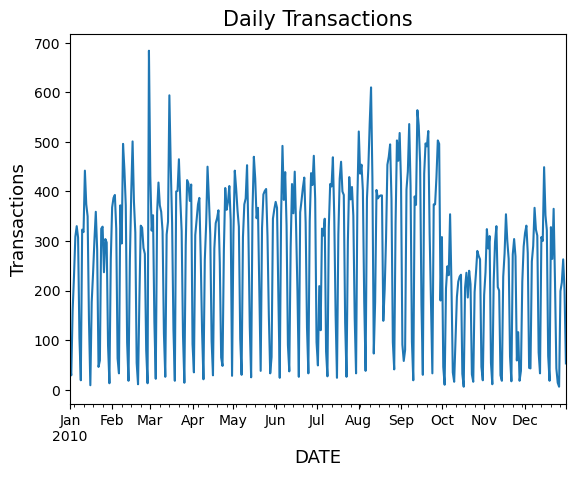

In [13]:
daily_count = df.assign(trx = np.ones(len(df))).groupby('Date').count().trx
ax = daily_count.plot()
ax.set_xlabel("DATE",fontsize=13)
ax.set_ylabel("Transactions",fontsize=13)
ax.set_title('Daily Transactions',fontsize = 15)

Text(0.5, 1.0, 'Weekly Transactions')

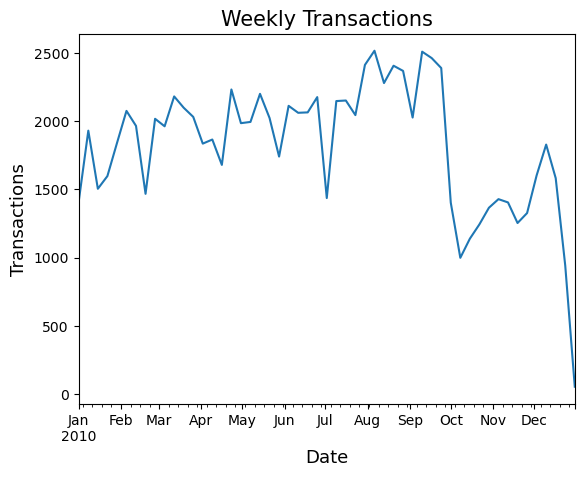

In [14]:
weekly_applications = df.assign(trx = np.ones(len(df))).set_index(df['Date']).resample(dt.timedelta(days = 7))\
    .count().trx
ax = weekly_applications.plot()
ax.set_xlabel("Date",fontsize=13)
ax.set_ylabel("Transactions",fontsize=13)
ax.set_title('Weekly Transactions',fontsize = 15)

Text(0.5, 1.0, 'Transaction Counts by Merchant Number')

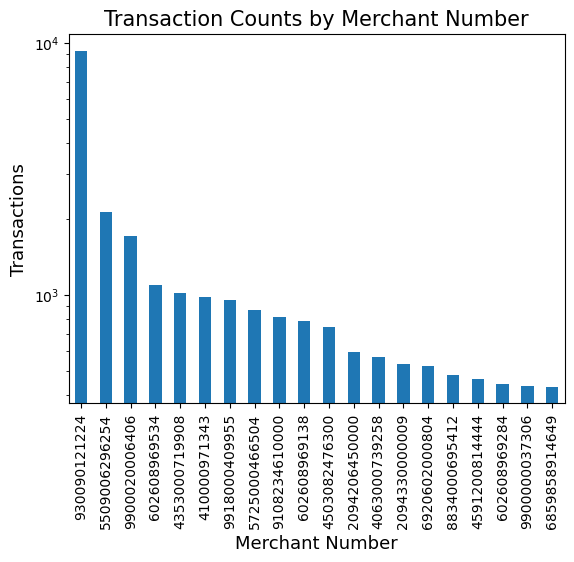

In [15]:
#Merchant Number
ax = df.Merchnum.value_counts().head(20).plot(kind='bar',logy=True)
ax.set_xlabel("Merchant Number",fontsize=13)
ax.set_ylabel("Transactions",fontsize=13)
ax.set_title('Transaction Counts by Merchant Number',fontsize = 15)

In [16]:
 df.Merchnum.value_counts().head(1)

930090121224    9310
Name: Merchnum, dtype: Int64

Text(0.5, 1.0, 'Transaction Counts by Merch Description')

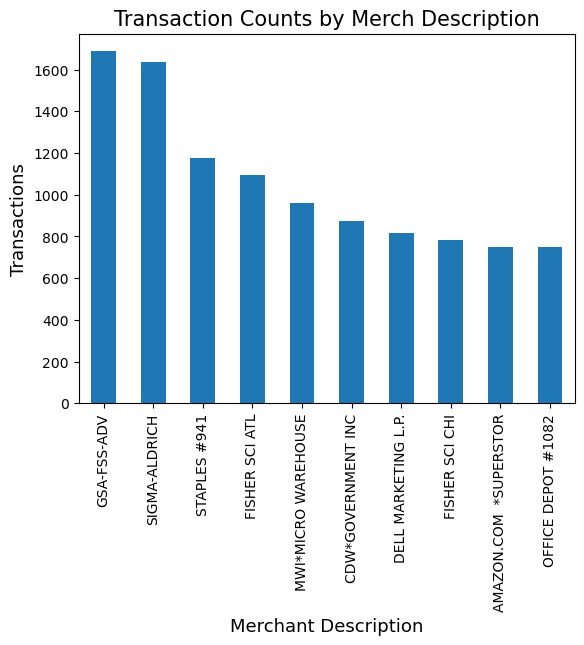

In [17]:
#Merch Description
ax = df['Merch description'].value_counts().head(10).plot(kind='bar')
ax.set_xlabel("Merchant Description",fontsize=13)
ax.set_ylabel("Transactions",fontsize=13)
ax.set_title('Transaction Counts by Merch Description',fontsize = 15)

In [18]:
df['Merch description'].value_counts().head(10)

GSA-FSS-ADV               1688
SIGMA-ALDRICH             1635
STAPLES #941              1174
FISHER SCI ATL            1093
MWI*MICRO WAREHOUSE        958
CDW*GOVERNMENT INC         872
DELL MARKETING L.P.        816
FISHER SCI CHI             783
AMAZON.COM  *SUPERSTOR     750
OFFICE DEPOT #1082         748
Name: Merch description, dtype: Int64

Text(0.5, 1.0, 'Transaction Counts by Merch State')

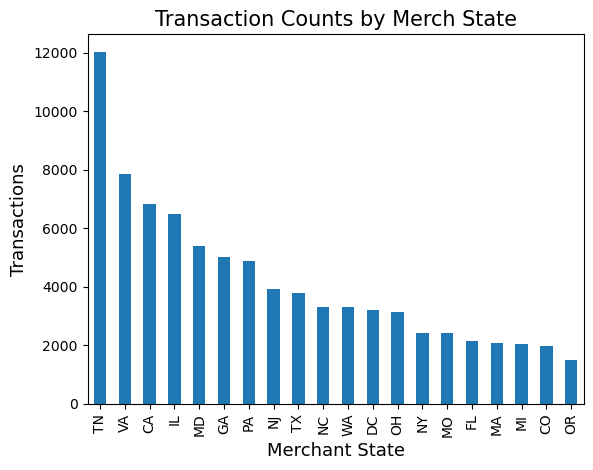

In [19]:
#merchant state
ax = df['Merch state'].value_counts().head(20).plot(kind='bar')
ax.set_xlabel("Merchant State",fontsize=13)
ax.set_ylabel("Transactions",fontsize=13)
ax.set_title('Transaction Counts by Merch State',fontsize = 15)

In [20]:
df['Merch state'].value_counts().head(1)

TN    12035
Name: Merch state, dtype: Int64

Text(0.5, 1.0, 'Transaction Counts by Merchant Zipcode')

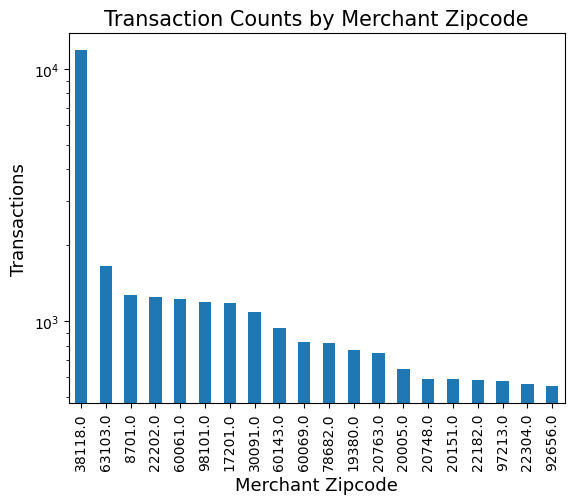

In [21]:
#Merch Zip
ax = df['Merch zip'].value_counts().head(20).plot(kind='bar',logy = True)
ax.set_xlabel("Merchant Zipcode",fontsize=13)
ax.set_ylabel("Transactions",fontsize=13)
ax.set_title('Transaction Counts by Merchant Zipcode',fontsize = 15)

In [22]:
df['Merch zip'].value_counts().head(1)

38118.0    11868
Name: Merch zip, dtype: Int64

Text(0.5, 1.0, 'Transaction Counts by Transaction Type')

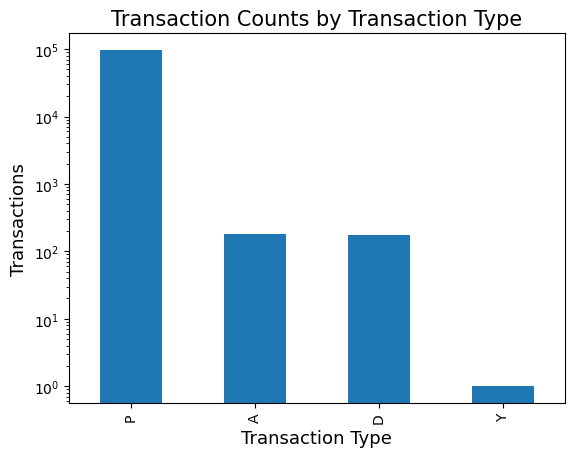

In [23]:
#Transtype
ax = df['Transtype'].value_counts().plot(kind='bar',logy = True)
ax.set_xlabel("Transaction Type",fontsize=13)
ax.set_ylabel("Transactions",fontsize=13)
ax.set_title('Transaction Counts by Transaction Type',fontsize = 15)

In [24]:
df['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: Int64

Text(0.5, 1.0, 'Transaction Counts by Card Number')

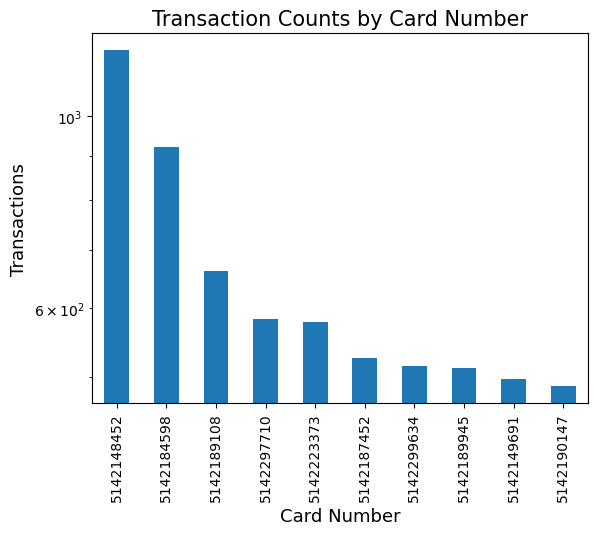

In [25]:
#cardnum
ax = df['Cardnum'].value_counts().head(10).plot(kind='bar',logy = True)
ax.set_xlabel("Card Number",fontsize=13)
ax.set_ylabel("Transactions",fontsize=13)
ax.set_title('Transaction Counts by Card Number',fontsize = 15)

In [26]:
df['Cardnum'].value_counts().head(1)

5142148452    1192
Name: Cardnum, dtype: Int64

Text(0.5, 1.0, 'Weekly Transactions Amount')

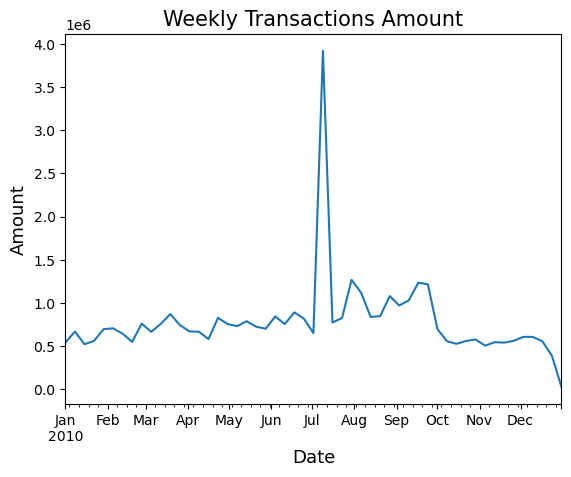

In [27]:
#amount
weekly_amount = df.set_index(df['Date']).resample(dt.timedelta(days = 7 )).sum().Amount
ax = weekly_amount.plot()
ax.set_xlabel("Date",fontsize=13)
ax.set_ylabel("Amount",fontsize=13)
ax.set_title('Weekly Transactions Amount',fontsize = 15)

/Users/margo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/margo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


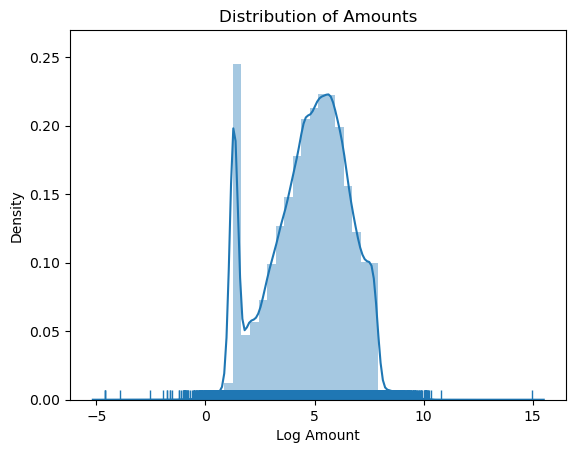

In [28]:
#density plot of log amount
import seaborn as sns
sns.distplot(np.log(df['Amount']), kde=True,rug  = True)
plt.xlabel('Log Amount')
plt.ylabel('Density')
plt.title('Distribution of Amounts')
plt.show()


Text(0.5, 1.0, 'Transaction Amount Distribution')

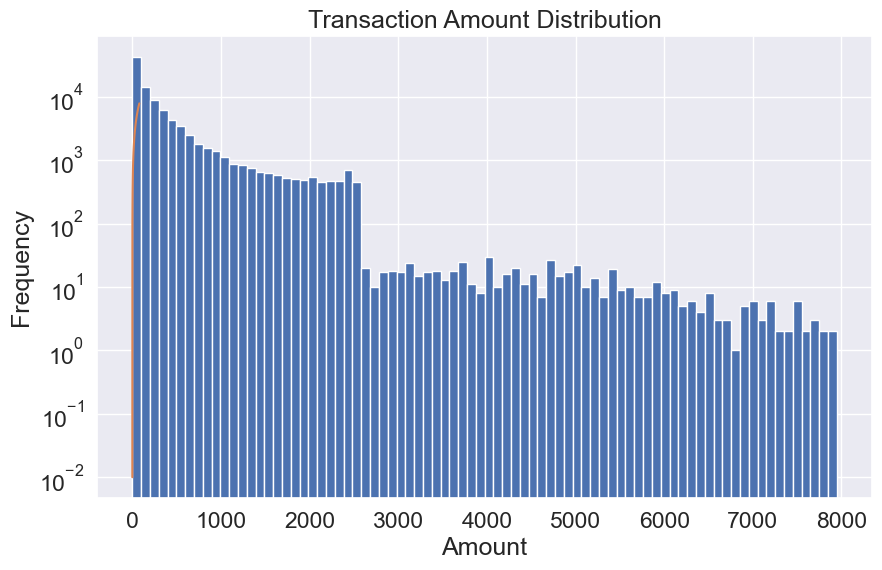

In [29]:
#bin plot of amount
sns.set(font_scale = 1.5)
plt.figure(figsize = (10,6))
num,bins_limit, patches = plt.hist(df[df['Amount']<=8000].Amount,bins = 80, log=True)
plt.plot(bins_limit[:80])
plt.plot(0,8000,1000)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution')

In [30]:
df.Amount

0           3.62
1          31.42
2         178.49
3           3.62
4           3.62
          ...   
96748      84.79
96749     118.75
96750     363.56
96751    2202.03
96752     554.64
Name: Amount, Length: 96753, dtype: float64

Text(0.5, 1.0, 'Transactions Count by Fraud Label ')

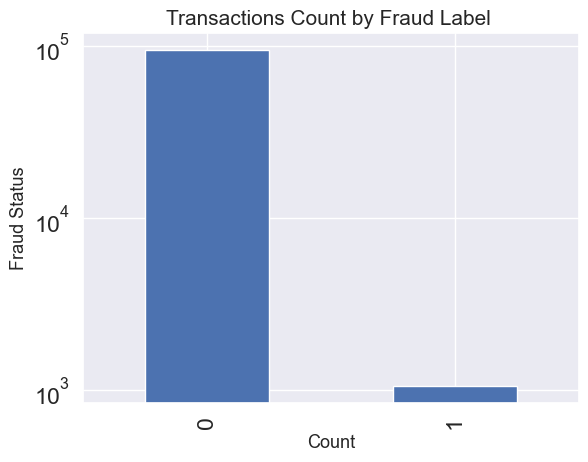

In [32]:
#fraud
goods = df[df['Fraud'] == 0]
bads = df[df['Fraud'] == 1]
ax = df['Fraud'].value_counts().plot(kind='bar',logy=True)
ax.set_xlabel("Count",fontsize=13)
ax.set_ylabel("Fraud Status",fontsize=13)
ax.set_title('Transactions Count by Fraud Label ',fontsize = 15)

In [33]:
df['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: Int64

In [34]:
df.to_csv('new_card_transactions.csv')